In [1]:
!wget http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip
!unzip ut-zap50k-images.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058592.265680.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058593.137771.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058593.382709.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058594.382712.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058594.382713.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058594.84280.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058597.104236.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058597.186729.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058601.173596.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058601.382726.jpg  
  inflating: ut-zap50k-images/Sho

In [2]:
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from skimage import io
import re
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import tqdm
from IPython.display import clear_output
import numpy as np
from collections import defaultdict
import random
import os

In [3]:
transform = transforms.Compose(
            [transforms.ToTensor(),
             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

a = torchvision.datasets.CIFAR100('./data', download=True, transform=transform)


Extracting ./data/cifar-100-python.tar.gz to ./data


In [4]:
cifar_pics = []
cifar_labels = []
for i in a:
  cifar_pics.append(i[0])
  cifar_labels.append(torch.tensor(0,dtype=torch.long))

In [5]:
import cv2

shoes_pics = []
shoes_labels = []
folder = 'ut-zap50k-images'

for cat in os.listdir(folder):
            folder1 = folder + "/" + cat
            if cat == '.DS_Store':
                continue
            for subcat in os.listdir(folder1):
                folder2 = folder1 + "/" + subcat
                if subcat == '.DS_Store':
                    continue
                for brand in os.listdir(folder2):
                    folder3 = folder2 + "/" + brand
                    if brand == '.DS_Store':
                        continue
                    for pic in os.listdir(folder3):
                        if random.randint(1, 100) > 30:
                            continue
                        img = cv2.imread(folder3 + "/" + pic)
                        res = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
                        shoes_pics.append(transform(res))
                        shoes_labels.append(torch.tensor(1,dtype=torch.long))

In [6]:
pics = torch.stack(cifar_pics + shoes_pics)
labels = cifar_labels + shoes_labels

In [7]:
class ShoesDetection(Dataset):
  def __init__(self, pics, labels):
    self.pics = pics
    self.labels = labels

  def __len__(self):
    return len(self.pics)

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
        idx = idx.tolist()

    return [self.pics[idx], self.labels[idx]]

In [8]:
ds = ShoesDetection(pics, labels)

In [9]:
trainsize = int(len(ds) * 0.6)
valsize = int(len(ds) * 0.2)
testsize = len(ds) - trainsize - valsize
trainset, valset, testset = torch.utils.data.random_split(ds, [trainsize, valsize, testsize]) 

In [10]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256)
testloader = torch.utils.data.DataLoader(testset, batch_size=256)
valloader = torch.utils.data.DataLoader(valset, batch_size=256)

In [ ]:
summary(model_ft.cuda(), (3,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 63, 63]          23,296
              ReLU-2           [-1, 64, 63, 63]               0
         MaxPool2d-3           [-1, 64, 31, 31]               0
            Conv2d-4          [-1, 192, 31, 31]         307,392
              ReLU-5          [-1, 192, 31, 31]               0
         MaxPool2d-6          [-1, 192, 15, 15]               0
            Conv2d-7          [-1, 384, 15, 15]         663,936
              ReLU-8          [-1, 384, 15, 15]               0
            Conv2d-9          [-1, 256, 15, 15]         884,992
             ReLU-10          [-1, 256, 15, 15]               0
           Conv2d-11          [-1, 256, 15, 15]         590,080
             ReLU-12          [-1, 256, 15, 15]               0
        MaxPool2d-13            [-1, 256, 7, 7]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
model_ft

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [11]:
classes = ('not shoe','shoe')

In [12]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.seq = nn.Sequential()
    self.seq.add_module('conv-1', nn.Conv2d(3, 64, (5,5), 1,2))
    self.seq.add_module('relu-1', nn.ReLU())
    self.seq.add_module('pool-1', nn.MaxPool2d(3,2))
    self.seq.add_module('conv-2', nn.Conv2d(64, 128, (3,3), 1,1))
    self.seq.add_module('relu-2', nn.ReLU())
    self.seq.add_module('pool-2', nn.MaxPool2d(3,2))
    self.seq.add_module('conv-3', nn.Conv2d(128, 192, (3,3), 1,1))
    self.seq.add_module('relu-3', nn.ReLU())
    self.seq.add_module('conv-4', nn.Conv2d(192, 128, (3,3), 1,1))
    self.seq.add_module('relu-4', nn.ReLU())
    self.seq.add_module('conv-5', nn.Conv2d(128, 128, (3,3), 1,1))
    self.seq.add_module('relu-5', nn.ReLU())
    self.seq.add_module('pool-5', nn.MaxPool2d(3,2))

    self.seq.add_module('flat', nn.Flatten())

    self.seq.add_module('drop-1', nn.Dropout())
    self.seq.add_module('lin-1', nn.Linear(1152, 512))
    self.seq.add_module('lin-relu-1', nn.ReLU())
    self.seq.add_module('drop-2', nn.Dropout())
    self.seq.add_module('lin-2', nn.Linear(512, 256))
    self.seq.add_module('lin-relu-2', nn.ReLU())
    self.seq.add_module('lin-3', nn.Linear(256, 2))

  def forward(self, x):
    return self.seq(x)

In [13]:
from torchsummary import summary

model = Classifier()
summary(model.cuda(), (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           4,864
              ReLU-2           [-1, 64, 32, 32]               0
         MaxPool2d-3           [-1, 64, 15, 15]               0
            Conv2d-4          [-1, 128, 15, 15]          73,856
              ReLU-5          [-1, 128, 15, 15]               0
         MaxPool2d-6            [-1, 128, 7, 7]               0
            Conv2d-7            [-1, 192, 7, 7]         221,376
              ReLU-8            [-1, 192, 7, 7]               0
            Conv2d-9            [-1, 128, 7, 7]         221,312
             ReLU-10            [-1, 128, 7, 7]               0
           Conv2d-11            [-1, 128, 7, 7]         147,584
             ReLU-12            [-1, 128, 7, 7]               0
        MaxPool2d-13            [-1, 128, 3, 3]               0
          Flatten-14                 [-

In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

count_loss = nn.CrossEntropyLoss()

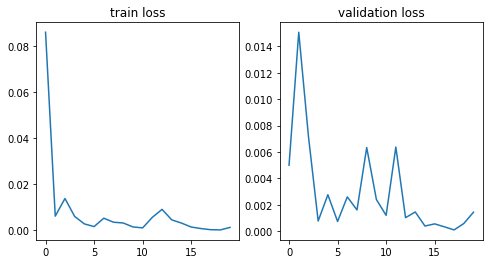

epoch : 20/20, train loss = 0.001283
epoch : 20/20, val loss = 0.001446


In [15]:
epochs = 20
trainloss = []
valloss = []

for epoch in range(epochs):
    batchloss = 0
    model.train(True)
    for xbatch, ybatch in tqdm.notebook.tqdm(trainloader):  

        optimizer.zero_grad()
        outputs = model(xbatch.cuda())
        train_loss = count_loss(outputs.cuda(), ybatch.cuda())
        train_loss.backward()
        optimizer.step()
        
        batchloss += train_loss.item()
    

    trainloss.append(batchloss / len(trainloader))

    # test loss
    
    with torch.no_grad():
      model.train(False)
      batchloss = 0
      for testx, testy in valloader:
        testx = testx.to("cuda")

        outputs = model(testx)
        batchloss += count_loss(outputs, testy.cuda())
        
      valloss.append(batchloss / len(testloader))

    # display 

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    clear_output(wait=True)
    axs[0].plot(trainloss)
    axs[0].set_title('train loss')
    axs[1].plot(valloss)
    axs[1].set_title('validation loss')
    plt.show()
    print("epoch : {}/{}, train loss = {:.6f}".format(epoch + 1, epochs, trainloss[-1]))
    print("epoch : {}/{}, val loss = {:.6f}".format(epoch + 1, epochs, valloss[-1]))

In [16]:
with torch.no_grad():
  model.eval()
  loss = 0
  for xbatch, ybatch in testloader:
    pred = model(xbatch.cuda())
    loss += count_loss(pred, ybatch.cuda())
  loss /= len(testloader)

print(loss)

tensor(0.0035, device='cuda:0')


In [17]:
torch.save(model, 'classifier.pt')

In [43]:
def showpic(inp):
  """
    inp: [torch.tensor, torch.long] – pic and class
  """
  fig, axs = plt.subplots(1, 1, figsize=(5, 5))
  axs.imshow(np.rot90(inp[0].cpu().numpy().T , k=-1))
  axs.set_title(classes[int(inp[1])])
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


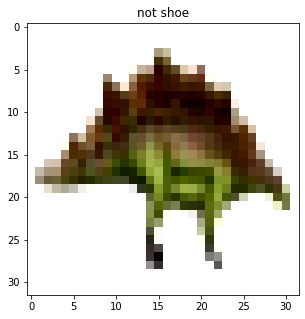

predicted: not shoe


In [85]:
example = ds[1]

showpic(example)
with torch.no_grad():
  pred = model(example[0].view(1,3,32,32).cuda())
print("predicted:", classes[torch.argmax(pred)])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


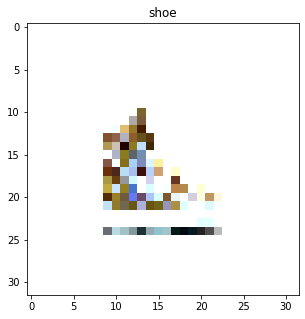

predicted: shoe


In [66]:
im = cv2.imread('dank.jpeg')
res = cv2.resize(im, (32,32))
x = transform(res)
showpic([x,1])
with torch.no_grad():
  pred = model(x.view(1,3,32,32).cuda())
print("predicted:", classes[torch.argmax(pred)])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


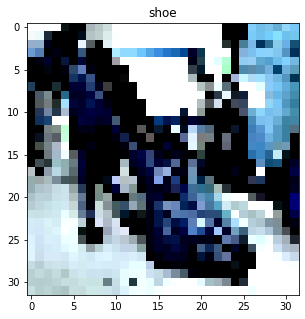

predicted: not shoe


In [67]:
im = cv2.imread('tapki.jpeg')
res = cv2.resize(im, (32,32))
x = transform(res)
showpic([x,1])
with torch.no_grad():
  pred = model(x.view(1,3,32,32).cuda())
print("predicted:", classes[torch.argmax(pred)])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


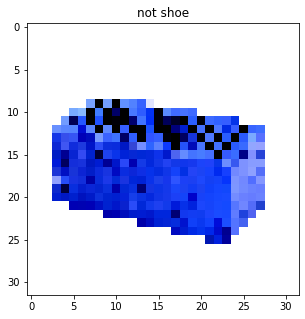

predicted: shoe


In [69]:
im = cv2.imread('kirpich.jpeg')
res = cv2.resize(im, (32,32))
x = transform(res)
showpic([x,0])
with torch.no_grad():
  pred = model(x.view(1,3,32,32).cuda())
print("predicted:", classes[torch.argmax(pred)])

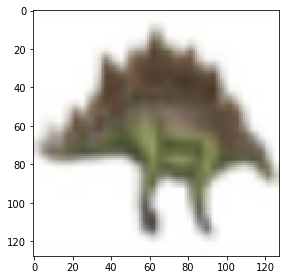

In [84]:
t = np.rot90(cifar_pics[1].numpy().T / 2 + 0.5, k=-1)
t = cv2.resize(t, (128,128))
io.imshow(t)

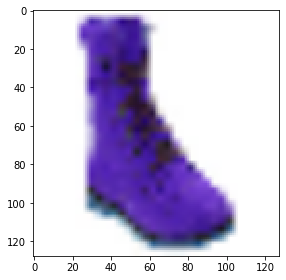

In [83]:
t = np.rot90(shoes_pics[1].numpy().T / 2 + 0.5, k=-1)
t = cv2.resize(t, (128,128))
io.imshow(t)